#Name: MANAVI UTTAM GHORPADE 
#File name: mg_lab4
#Date:03/11/2022

# LINEAR CLASSIFIERS Project 

In this project you will be working with a artificial advertising data indicating whether or not a particular Internet user clicked on an advertisement on a company website. You will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report 

## 1. Get the Data
**Read in the advertising.csv file and set it to a data frame.**

In [2]:
advertising_data = pd.read_csv('advertising.csv')

**Check the head of the data**

In [3]:
advertising_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() the full data**

In [4]:
advertising_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
advertising_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## 2. Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

FOR EACH GRAPH:  
1.   Add your name to the title
2.   Modify the color from original shown
3.   Make an observational statement about the data 


** Create a histogram of the Age**
Based on your graph, state an observation about the data.

*The age data shows us many people have age between 29 to 30 because 30 is having the highest value in graph.*

*So most of the peoeple accessing the website have age around 30.*

Text(0.5, 1.0, 'Manavi Ghorpade')

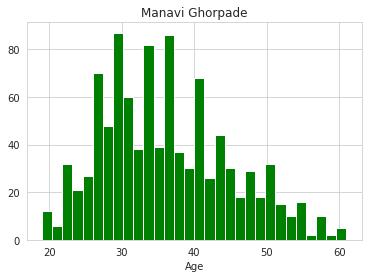

In [6]:
sns.set_style('whitegrid')        #histogram representation of age data 
advertising_data['Age'].hist(bins=30,color="g")
plt.xlabel('Age')
plt.title("Manavi Ghorpade")

**Create a jointplot showing Area Income versus Age.**

*The plot shows us that the user between age 20 to 40 who acccess the website have more area income. it means customer of age 20 to 40 belong  to geographical area which has more avg. income*

Text(0.5, 1.0, 'Manavi Ghorpade')

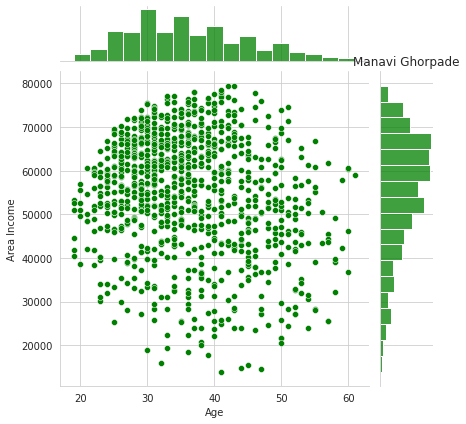

In [7]:
sns.jointplot(x='Age',y='Area Income',data=advertising_data,color='g')  #jointplot for area vs age
plt.title("Manavi Ghorpade")

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

*It shows that the customers between age 25 to 35 spend more time on the site.*

Text(0.5, 1.0, 'Manavi Ghorpade')

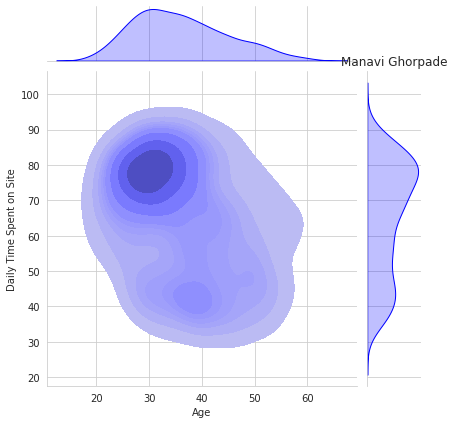

In [8]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=advertising_data,color='b',kind='kde',fill="true");  #jointplot showing kde 
plt.title("Manavi Ghorpade")

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

*The customer who spend time  65 to 90 minutes on site daily mostly have more daily internet usage.customer who spend time 30 to 65 minutes on site daily have mostly less daily internet usage.*

Text(0.5, 1.0, 'Manavi Ghorpade')

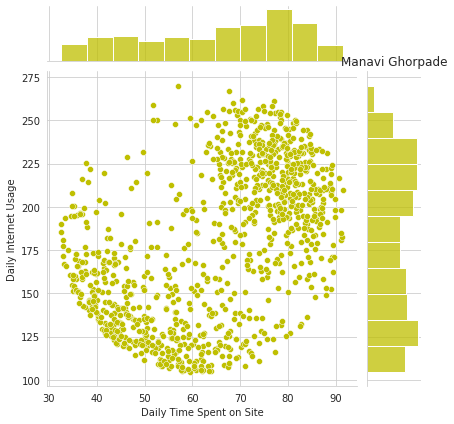

In [9]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=advertising_data,color='y') #joinplot
plt.title("Manavi Ghorpade")

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.** Your pairplot may display a bit differently, and that's OK.
Also, don't worry about title placement (as long as it's somewhere).

*It shows to two different data with two different colors.* 

Text(0.5, 0.98, 'Manavi Ghorpade')

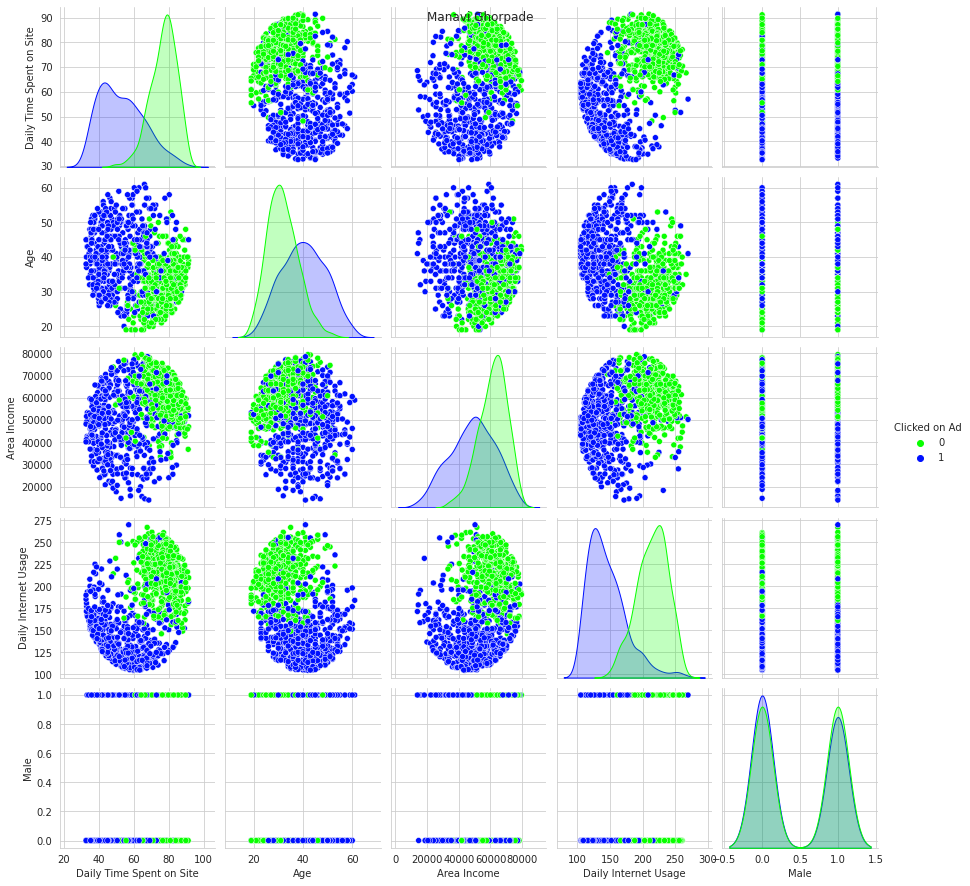

In [10]:
sns.pairplot(advertising_data,hue='Clicked on Ad',palette='hsv') #pairplot
plt.suptitle("Manavi Ghorpade")

## 3.[ Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

Now it's time to do a train test split, and train our model! You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

** Train and fit a logistic regression model on the training set.**

** The default parameter values are shown below. You may choose to alter as you see fit, those parameters which you understand.**

In [11]:
from sklearn.model_selection import train_test_split   #import train_test_split
X = advertising_data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']]  #data
y = advertising_data['Clicked on Ad']   #target data
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=60) #divide the data into train and test
from sklearn.linear_model import LogisticRegression

## 4. Predictions and Evaluations
Now predict values for the testing data.
**Make adjustments to C** to improve your **model**; Generate multiple models to demonstrate *overfitting*, *underfitting*, and *best fit* (be sure to add comments to distinguish them).

** Demonstrate the model's performance using the *score* or *classification_report* method.  Do this for both the TRAINING and the TEST sets.

**BEST** **FIT**

In [12]:
model = LogisticRegression(C=0.0001)  #c=Inverse of regularization strength ,smaller values specify stronger regularization.
model.fit(X_train,y_train) #fit model


LogisticRegression(C=0.0001)

In [13]:
predictions = model.predict(X_train) #model performance for train data
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       378
           1       0.97      0.94      0.95       372

    accuracy                           0.96       750
   macro avg       0.96      0.96      0.96       750
weighted avg       0.96      0.96      0.96       750



In [14]:
predictions = model.predict(X_test) #makes prediction of y_test values for x_test
print(classification_report(y_test,predictions)) #model performance for test data

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       122
           1       1.00      0.92      0.96       128

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



**UNDER FIT**

In [15]:
model = LogisticRegression(C=0.000000001)  #changed c value to get under fit model
model.fit(X_train,y_train)  #fit model

LogisticRegression(C=1e-09)

In [16]:
predictions = model.predict(X_train) #train data
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       378
           1       0.00      0.00      0.00       372

    accuracy                           0.50       750
   macro avg       0.25      0.50      0.34       750
weighted avg       0.25      0.50      0.34       750



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
predictions = model.predict(X_test) #make prediction
print(classification_report(y_test,predictions)) #create report for test data

              precision    recall  f1-score   support

           0       0.49      1.00      0.66       122
           1       0.00      0.00      0.00       128

    accuracy                           0.49       250
   macro avg       0.24      0.50      0.33       250
weighted avg       0.24      0.49      0.32       250



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**OVER FIT**

In [18]:
model = LogisticRegression(C=999999999999999999999999999,random_state=0,tol=0,max_iter=500000)  #max value of C to over fit model
model.fit(X_train,y_train)
predictions = model.predict(X_train)
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       378
           1       0.93      0.87      0.90       372

    accuracy                           0.90       750
   macro avg       0.90      0.90      0.90       750
weighted avg       0.90      0.90      0.90       750



In [19]:
predictions = model.predict(X_test) #test data 
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       122
           1       0.92      0.84      0.88       128

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250



## 5. Generate, Test, and Assess (as in #4 above),  a *best fit* [Linear **SUPPORT VECTOR CLASSIFIER**](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html?highlight=linear%20svc#sklearn.svm.LinearSVC)! You may adjust the parameters you understand, as you see fit.

In [20]:
from sklearn.svm import LinearSVC  #used linear support vector classifier
model1=LinearSVC(C=1,random_state=0,max_iter=50000) #max_iter=the maximum number of iterations to be run
model1.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=1, max_iter=50000, random_state=0)

In [21]:
predictions = model1.predict(X_train)  #report for train data
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       378
           1       0.96      0.81      0.88       372

    accuracy                           0.89       750
   macro avg       0.90      0.89      0.89       750
weighted avg       0.90      0.89      0.89       750



In [22]:
predictions = model1.predict(X_test) #for test data
print(classification_report(y_test,predictions)) 

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       122
           1       0.94      0.77      0.85       128

    accuracy                           0.86       250
   macro avg       0.87      0.86      0.86       250
weighted avg       0.87      0.86      0.86       250



## 6. Generate, Test, and Assess (as in #4 above), a *best fit* appropriate type of the [**NAIVE BAYES classifier**](https://scikit-learn.org/stable/modules/naive_bayes.html)! You may adjust the parameters you understand, as you see fit.

In [23]:
from sklearn.naive_bayes import GaussianNB  #used gaussian naive bayes classifier
model2=GaussianNB()
model2.fit(X_train,y_train)

GaussianNB()

In [24]:
predictions = model2.predict(X_train) #train data
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       378
           1       0.97      0.97      0.97       372

    accuracy                           0.97       750
   macro avg       0.97      0.97      0.97       750
weighted avg       0.97      0.97      0.97       750



In [25]:
predictions = model2.predict(X_test) #test data
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       122
           1       0.99      0.93      0.96       128

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



## 7. MULTI-CLASSIFICATION
### Select and load a multi-class problem from the [sklearn datasets.](https://scikit-learn.org/stable/modules/classes.html?highlight=datasets#module-sklearn.datasets//)
### Choose your favorite linear classification method from those practiced above.
### Generate 3 estimators of the same model-type, one each which *overfits*, *underfits*, and *best fit*. Display performance measures for each, and label them.
### Briefly explain what parameters you altered and how you think that impacted the results for this final set of estimators, on  your chosen dataset.


In [26]:
from sklearn.datasets import load_iris #load iris data
d=load_iris()
X= d['data']
y=d['target']

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=50)

In [27]:
model = LogisticRegression(C=0.301)  #c=Inverse of regularization strength ,smaller values specify stronger regularization.
model.fit(X_train,y_train) #used logistic regression

LogisticRegression(C=0.301)

**BEST FIT**

In [28]:
predictions = model.predict(X_train) #train data
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.97      0.94      0.96        35
           2       0.95      0.97      0.96        38

    accuracy                           0.97       112
   macro avg       0.97      0.97      0.97       112
weighted avg       0.97      0.97      0.97       112



In [29]:
predictions = model.predict(X_test) #test data
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      0.93      0.93        15
           2       0.92      0.92      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



**OVER FIT**

In [30]:
model = LogisticRegression(C=999999999999999999999)  #c=Inverse of regularization strength ,smaller values specify stronger regularization.
model.fit(X_train,y_train) #fit model

LogisticRegression(C=999999999999999999999)

In [31]:
predictions = model.predict(X_train)  #train data
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.97      0.97      0.97        35
           2       0.97      0.97      0.97        38

    accuracy                           0.98       112
   macro avg       0.98      0.98      0.98       112
weighted avg       0.98      0.98      0.98       112



In [32]:
predictions = model.predict(X_test) #test data
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.80      0.89        15
           2       0.80      1.00      0.89        12

    accuracy                           0.92        38
   macro avg       0.93      0.93      0.93        38
weighted avg       0.94      0.92      0.92        38



**UNDER FIT**



In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.000000000011)  #c=Inverse of regularization strength ,smaller values specify stronger regularization.
model.fit(X_train,y_train) #fit model

LogisticRegression(C=1.1e-11)

In [34]:
predictions = model.predict(X_train)  #got less value for x_train 
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.00      0.00      0.00        35
           2       0.34      1.00      0.51        38

    accuracy                           0.34       112
   macro avg       0.11      0.33      0.17       112
weighted avg       0.12      0.34      0.17       112



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
predictions = model.predict(X_test) #got less value for x_train
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        15
           2       0.32      1.00      0.48        12

    accuracy                           0.32        38
   macro avg       0.11      0.33      0.16        38
weighted avg       0.10      0.32      0.15        38



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


I am using logistic regression model and generated 3 estimators-overfits, underfits, and best fit.The parameter we have changed in these three is C.C is inverse to lambda .

C = 1/λ

It is the hyperparameter which controls the regularization basically to avoid overfitting the model.As C tends to infinity the regularization term i.e lamda tends to 0, which may result in overfit our model.In our case I have assigned the value of c=9999999999 to get overfitting.

and if the value of lamba tends to infinity then c value tends to zero which will give us the underfit model.hence we have given C=0.000000000011 to make our model under-fit.

for the best fit we have c=0.301. which gives us a best fit model.



# Great Job!